In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
ds = pd.read_csv("predictive_maintenance.csv")

In [3]:
ds.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
ds.shape

(10000, 10)

In [5]:
ds.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
ds.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
ds = ds.drop(["UDI", "Product ID"], axis=1)

In [8]:
ds.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [10]:
ds.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [11]:
old_col = ds.columns
new_col = ['type','air_temp','process_temp','rot_speed','torque','tool_wear','target','failure_type']
ds.columns = new_col

In [12]:
ds.head()

,type,air_temp,process_temp,rot_speed,torque,tool_wear,target,failure_type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [13]:
print(ds.type.unique())
print(ds.failure_type.unique())

['M' 'L' 'H']
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [14]:
valueCounts1 = ds.type.value_counts()
valueCounts1

L    6000
M    2997
H    1003
Name: type, dtype: int64

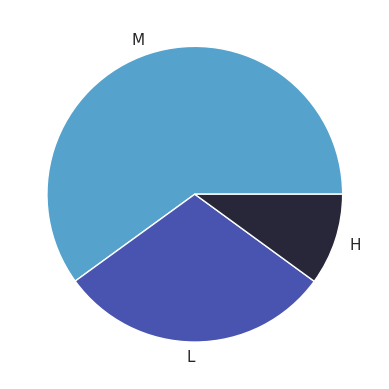

In [15]:
sns.set_theme(style='darkgrid',palette='icefire')
plt.pie(valueCounts1, labels = ds.type.unique())
plt.show()

In [16]:
valueCounts2 = ds.failure_type.value_counts()
valueCounts2

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: failure_type, dtype: int64

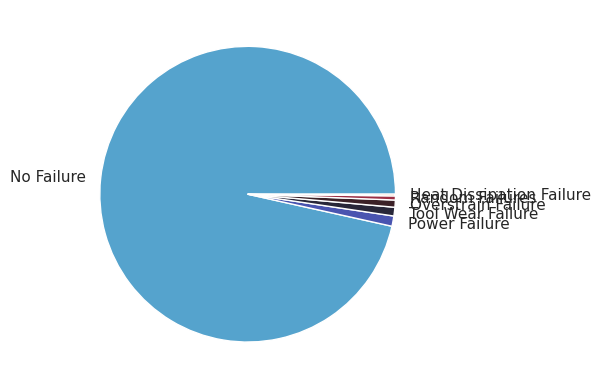

In [17]:
plt.pie(valueCounts2, labels = ds.failure_type.unique())
plt.show()

In [18]:
valueCounts3 = ds.target.value_counts()
valueCounts3

0    9661
1     339
Name: target, dtype: int64

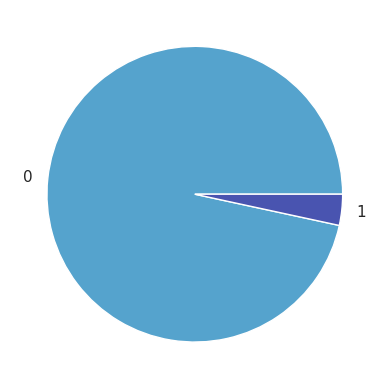

In [19]:
plt.pie(valueCounts3, labels=ds.target.unique())
plt.show()

In [20]:
failure_dtype = ds[['target','failure_type']][ds['failure_type'] == 'No Failure']
failure_dtype

,target,failure_type
0,0,No Failure
1,0,No Failure
2,0,No Failure
3,0,No Failure
4,0,No Failure
...,...,...
9995,0,No Failure
9996,0,No Failure
9997,0,No Failure
9998,0,No Failure


In [21]:
failure_dtype.value_counts()

target  failure_type
0       No Failure      9643
1       No Failure         9
dtype: int64

In [22]:
ds.head()

,type,air_temp,process_temp,rot_speed,torque,tool_wear,target,failure_type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


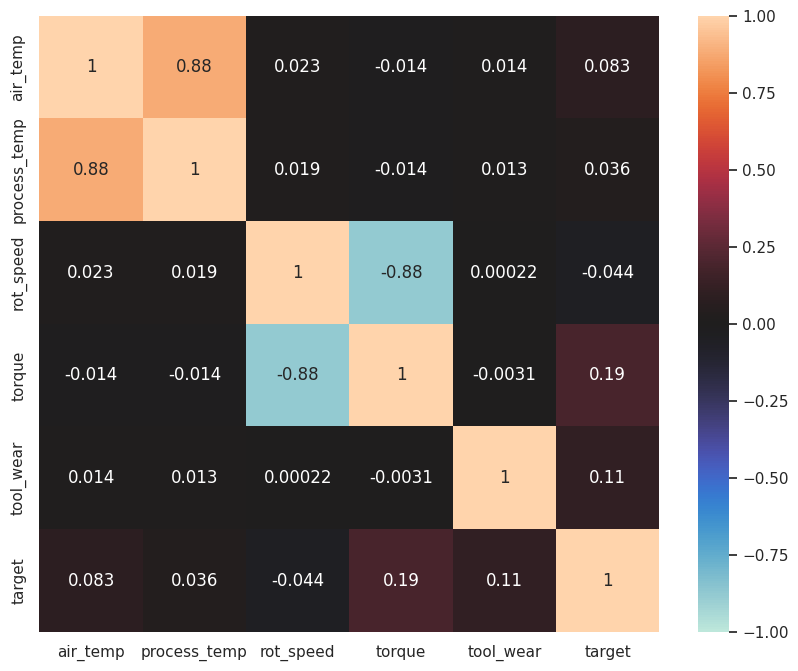

In [23]:
all_num = ['air_temp','process_temp','rot_speed','torque','tool_wear','target']
data_corr = ds[all_num].corr()
plt.figure(figsize=(10,8))
corrplot = sns.heatmap(data_corr, vmin=-1, vmax = 1, cmap='icefire',annot=True)

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
oh_cols = pd.DataFrame(ohe.fit_transform(ds['type'].array.reshape(-1,1)))
oh_cols = oh_cols.rename(columns={0:'H',1:'L',2:'M'})
ds[['H','L','M']] = oh_cols[['H','L','M']]
ds.drop(columns='type',inplace=True)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
ds_drop_index = ds.loc[(ds.target==1) & (ds['failure_type']=='No Failure')]
ds.drop(index = ds_drop_index.index, inplace=True)
ds.drop(columns = ['failure_type'],inplace=True)
ds = ds.reset_index(drop=True)

In [29]:
ds.head()

,air_temp,process_temp,rot_speed,torque,tool_wear,target,H,L,M
0,298.1,308.6,1551,42.8,0,0,0.0,0.0,1.0
1,298.2,308.7,1408,46.3,3,0,0.0,1.0,0.0
2,298.1,308.5,1498,49.4,5,0,0.0,1.0,0.0
3,298.2,308.6,1433,39.5,7,0,0.0,1.0,0.0
4,298.2,308.7,1408,40.0,9,0,0.0,1.0,0.0


In [30]:
x = ds.drop(columns='target')
y = ds['target']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
x_train

array([[ 0.99674427,  0.46691306, -0.48846795, ..., -0.33513777,
         0.82101636, -0.65726816],
       [-1.19172549, -1.06992201, -0.79674768, ..., -0.33513777,
        -1.21800252,  1.52144902],
       [-0.54513215, -0.53537068, -0.71827647, ..., -0.33513777,
        -1.21800252,  1.52144902],
       ...,
       [ 0.64857862,  0.06599957, -1.51980376, ..., -0.33513777,
         0.82101636, -0.65726816],
       [-0.694346  , -0.40173285, -0.99853077, ...,  2.98384747,
        -1.21800252, -0.65726816],
       [-0.14722856, -0.53537068, -0.66222561, ..., -0.33513777,
         0.82101636, -0.65726816]])

In [34]:
x_test

array([[-0.84355985, -0.40173285,  0.30745425, ..., -0.33513777,
        -1.21800252,  1.52144902],
       [-1.04251164, -0.66900851, -1.40209696, ..., -0.33513777,
         0.82101636, -0.65726816],
       [-0.54513215, -0.06763827, -0.76311716, ..., -0.33513777,
         0.82101636, -0.65726816],
       ...,
       [ 0.44962683,  0.46691306, -0.17458314, ..., -0.33513777,
         0.82101636, -0.65726816],
       [-1.29120139, -0.86946526,  0.46439666, ...,  2.98384747,
        -1.21800252, -0.65726816],
       [ 1.14595811,  0.13281848, -0.1913984 , ...,  2.98384747,
        -1.21800252, -0.65726816]])

In [53]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
y_pred_dtc = dtc.predict(x_test)
y_pred_dtc

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion matrix is: \n",confusion_matrix(y_test,y_pred_dtc))
print("accuracy is: ",accuracy_score(y_test,y_pred_dtc))

confusion matrix is: 
 [[1899   19]
 [  28   53]]
accuracy is:  0.976488244122061


In [44]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [45]:
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion matrix is: \n",confusion_matrix(y_test,y_pred_rfc))
print("accuracy is: ",accuracy_score(y_test,y_pred_rfc))

confusion matrix is: 
 [[1915    3]
 [  39   42]]
accuracy is:  0.9789894947473737


In [47]:
#GRADIENT BOOSTING CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [48]:
y_pred_gbc = gbc.predict(x_test)
y_pred_gbc

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion matrix is: \n",confusion_matrix(y_test,y_pred_gbc))
print("accuracy is: ",accuracy_score(y_test,y_pred_gbc))

confusion matrix is: 
 [[1908   10]
 [  27   54]]
accuracy is:  0.9814907453726863


In [50]:
#XGB 
import xgboost as xgb 
xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [51]:
y_pred_xgb = xgb.predict(x_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion matrix is: \n",confusion_matrix(y_test,y_pred_xgb))
print("accuracy is: ",accuracy_score(y_test,y_pred_xgb))

confusion matrix is: 
 [[1911    7]
 [  25   56]]
accuracy is:  0.983991995997999


In [ ]:
# RESULTS FROM THE PROGRAM SHOW XGB WITH THE MOST ACCURACY OF 98.3%